(sec:pandas10min_2)=
# 판다스 10분 완성 2부


**필수 라이브러리**

In [1]:
import numpy as np
import pandas as pd

## 데이터 결합: merge-join-concat

- 참고: [Merging section](https://pandas.pydata.org/docs/user_guide/merging.html#merging)

### 이어붙이기: `pd.concat()` 함수

`pd.concat()` 함수는 여러 개의 데이터프레임을 하나로 합친다.

아래 코드는 실습을 위해 임의로 생성된 데이터프레임을 세 개로 쪼갠다.

In [2]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.085756,-1.165100,1.680553,1.328616
1,1.068873,0.626490,0.046536,0.079688
2,0.691819,-0.118218,-0.124067,-0.467934
3,1.059726,0.404912,0.650918,0.771730
4,1.962559,-0.150556,1.567139,-0.215399
5,-1.000001,0.585765,-0.676855,-0.475557
6,-0.205473,1.505803,-0.204298,-0.437442
7,-0.034301,0.069710,-0.281269,-1.672968
8,-1.064125,-1.084639,0.568588,0.708712
9,-1.425013,0.721024,1.353778,0.510781


In [3]:
pieces = [df[:3], df[3:7], df[7:]]

아래 코드는 쪼갠 3 개의 데이터프레임을 **횡으로 합쳐**, 즉 열을 추가하는 방식으로
원래의 데이터프레임과 동일한 데이터프레임을 생성한다.

In [4]:
pd.concat(pieces)

,0,1,2,3
0,1.085756,-1.165100,1.680553,1.328616
1,1.068873,0.626490,0.046536,0.079688
2,0.691819,-0.118218,-0.124067,-0.467934
3,1.059726,0.404912,0.650918,0.771730
4,1.962559,-0.150556,1.567139,-0.215399
5,-1.000001,0.585765,-0.676855,-0.475557
6,-0.205473,1.505803,-0.204298,-0.437442
7,-0.034301,0.069710,-0.281269,-1.672968
8,-1.064125,-1.084639,0.568588,0.708712
9,-1.425013,0.721024,1.353778,0.510781


### 합병: `pd.merge()` 함수

`pd.join()` 함수 는 SQL 방식으로 특정 열을 기준으로 두 개의 데이터프레임을 합친다.
다양한 옵션을 지원하는 매우 강력한 도구이다.

- 참고: [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join)

**예제**

실습을 위해 아래 두 데이터프레임을 이용한다.

In [5]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [6]:
left

,key,lval
0,foo,1
1,foo,2


In [7]:
right

,key,rval
0,foo,4
1,foo,5


- `on="key"` 키워드 인자
    - `key` 열에 사용된 항목 각각에 대해 다른 열에서 해당 항목과 연관된 값들을 조합할 수 있는 모든 경우의 수를 다룬다.
    - `foo` 값에 대해 `lval` 열에서 2개의 값이,
        `rval` 열에서 2개의 값이 있기에 `foo`와 관련해서 총 4개의 경우가 생성된다.
        
    | `key` | `left.lval` | `right.rval` | 경우의 수 |
    | :---: | :---: | :---: | :---: |
    | `foo` | `1, 2` | `4, 5` | 4 |

In [8]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


**예제**

In [9]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [10]:
left

,key,lval
0,foo,1
1,bar,2


In [11]:
right

,key,rval
0,foo,4
1,bar,5


- `on="key"` 키워드 인자
    - `key` 열에 사용된 항목별로 모든 경우의 수를 다룬다.
    - `foo` 값에 대해 `lval` 열에서 1개의 값이,
        `rval` 열에서 1개의 값이 있기에 `foo`와 관련해서 총 1개의 경우가 생성된다.
    - `bar` 값에 대해 `lval` 열에서 1개의 값이,
        `rval` 열에서 1개의 값이 있기에 `foo`와 관련해서 총 1개의 경우가 생성된다.
        
    | `key` | `left.lval` | `right.rval` | 경우의 수 |
    | :---: | :---: | :---: | :---: |
    | `foo` | `1` | `4` | 1 |        
    | `bar` | `2` | `5` | 1 |        

In [12]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


**예제**

경우의 수는 지정된 열의 항목이 사용된 횟수를 기준으로 한다. 

In [13]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

In [14]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [15]:
right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [16]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


| `key` | (`left.A`, `left.B`) | (`right.C`, `right.D`) | 경우의 수 |
| :---: | :---: | :---: | :---: |
| `K0` | (`A0`, `B0`) | (`C0`, `D0`) | 1 |
| `K1` | (`A1`, `B1`) | (`C1`, `D1`) | 1 |
| `K2` | (`A2`, `B2`) | (`C2`, `D2`) | 1 |
| `K3` | (`A3`, `B3`) | (`C3`, `D3`) | 1 |

In [17]:
result = pd.merge(left, right, on="key")
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


**다양한 키워드 인자**

In [18]:
left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [19]:
right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


- `how='inner'`: 지정된 키의 교집합 대상

In [20]:
result = pd.merge(left, right, on=["key1", "key2"]) # how='inner' 가 기본값
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [21]:
result = pd.merge(left, right, how="inner", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


- `how='outer'`: 지정된 키의 합집합 대상

In [22]:
result = pd.merge(left, right, how="outer", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


- `how='left'`: 왼쪽 데이터프레임의 키에 포함된 항목만 대상

In [23]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [24]:
result = pd.merge(left, right, how="left", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


- `how='right'`: 오른쪽 데이터프레임의 키에 포함된 항목만 대상

In [25]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [26]:
result = pd.merge(left, right, how="right", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


- `how='cross'`: 모든 경우의 수 조합

In [27]:
result = pd.merge(left, right, how="cross")
result

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K1,K0,C2,D2
3,K0,K0,A0,B0,K2,K0,C3,D3
4,K0,K1,A1,B1,K0,K0,C0,D0
5,K0,K1,A1,B1,K1,K0,C1,D1
6,K0,K1,A1,B1,K1,K0,C2,D2
7,K0,K1,A1,B1,K2,K0,C3,D3
8,K1,K0,A2,B2,K0,K0,C0,D0
9,K1,K0,A2,B2,K1,K0,C1,D1


## 그룹화: `pd.groupby()` 함수

- 참고: [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby)

`pd.groupby()` 함수는 다음 3 기능을 제공한다.

- **분류**: 데이터를 조건에 따라 여러 그룹으로 분류
- **함수 적용**: 그룹별로 함수 적용
- **조합**: 그룹별 함수 결과를 조합하여 새로운 데이터프레임/시리즈 생성

In [28]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

df

,A,B,C,D
0,foo,one,-0.624063,-0.201257
1,bar,one,0.630989,2.554790
2,foo,two,1.255999,-1.349012
3,bar,three,-0.968374,0.058542
4,foo,two,-0.448369,-0.549102
5,bar,two,0.551332,-2.349309
6,foo,one,-0.312892,-1.299743
7,bar,three,0.002989,-0.609408


- `A` 열에 사용된 항목 기준으로 그룹으로 분류한 후 그룹별로 `C`와 `D` 열의 모든 항목의 합 계산해서 새로운 데이터프레임 생성

| `A`(사용횟수) | 경우의 수 |
| :---: | :---: |
| `bar`(4) | 1 |
| `foo`(4) | 1 |

In [29]:
df.groupby('A')[["C", "D"]].sum()

,C,D
A,,
bar,0.216935,-0.345385
foo,-0.129325,-3.399113


- `A`열의 항목과 `B` 열의 항목의 조합을 기준으로 그룹으로 그룹별로 `C`와 `D` 열의 모든 항목의 합 계산해서 새로운 데이터프레임 생성

| `A`(사용횟수) | `B`(사용횟수) | 경우의 수 |
| :---: | :---: | :---: |
| `bar`(4) | `one`(2), `two`(2) | 2 |
| `foo`(4) | `one`(1), `three`(2), `two`(1) | 3 |

In [30]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.630989  2.554790
    three -0.965385 -0.550866
    two    0.551332 -2.349309
foo one   -0.936955 -1.501000
    two    0.807630 -1.898114

**그룹 확인**

- `for` 반복문 활용 

In [31]:
for name, group in df.groupby(["A", "B"]):
    print(name)
    print(group)

('bar', 'one')
     A    B         C        D
1  bar  one  0.630989  2.55479
('bar', 'three')
     A      B         C         D
3  bar  three -0.968374  0.058542
7  bar  three  0.002989 -0.609408
('bar', 'two')
     A    B         C         D
5  bar  two  0.551332 -2.349309
('foo', 'one')
     A    B         C         D
0  foo  one -0.624063 -0.201257
6  foo  one -0.312892 -1.299743
('foo', 'two')
     A    B         C         D
2  foo  two  1.255999 -1.349012
4  foo  two -0.448369 -0.549102


- `get_group()` 메서드

In [32]:
df.groupby(["A", "B"]).get_group(('bar', 'one'))

,A,B,C,D
1,bar,one,0.630989,2.55479


In [33]:
df.groupby(["A", "B"]).get_group(('bar', 'three'))

,A,B,C,D
3,bar,three,-0.968374,0.058542
7,bar,three,0.002989,-0.609408


- `groups` 속성

In [34]:
df.groupby(["A", "B"]).groups

{('bar', 'one'): [1], ('bar', 'three'): [3, 7], ('bar', 'two'): [5], ('foo', 'one'): [0, 6], ('foo', 'two'): [2, 4]}

- `value_counts` 속성

In [35]:
df.groupby(["A", "B"]).value_counts()

A    B      C          D        
bar  one     0.630989   2.554790    1
     three  -0.968374   0.058542    1
             0.002989  -0.609408    1
     two     0.551332  -2.349309    1
foo  one    -0.624063  -0.201257    1
            -0.312892  -1.299743    1
     two    -0.448369  -0.549102    1
             1.255999  -1.349012    1
dtype: int64

- `nunique` 속성

In [36]:
df.groupby(["A", "B"]).nunique()

C  D
A   B          
bar one    1  1
    three  2  2
    two    1  1
foo one    2  2
    two    2  2

- `sort=True` 키워드 인자

In [37]:
df.groupby(["A", "B"], sort=True).sum()

C         D
A   B                        
bar one    0.630989  2.554790
    three -0.965385 -0.550866
    two    0.551332 -2.349309
foo one   -0.936955 -1.501000
    two    0.807630 -1.898114

In [38]:
df.groupby(["A", "B"], sort=False).sum()

C         D
A   B                        
foo one   -0.936955 -1.501000
bar one    0.630989  2.554790
foo two    0.807630 -1.898114
bar three -0.965385 -0.550866
    two    0.551332 -2.349309

In [39]:
df.groupby(["A", "B"], sort=False).nunique()

C  D
A   B          
foo one    2  2
bar one    1  1
foo two    2  2
bar three  2  2
    two    1  1

**그룹 연산**

In [40]:
df.groupby('A')[["C", "D"]].max()

,C,D
A,,
bar,0.630989,2.554790
foo,1.255999,-0.201257


In [41]:
df.groupby(["A", "B"]).max()

C         D
A   B                        
bar one    0.630989  2.554790
    three  0.002989  0.058542
    two    0.551332 -2.349309
foo one   -0.312892 -0.201257
    two    1.255999 -0.549102

In [42]:
df.groupby('A')[["C", "D"]].mean()

,C,D
A,,
bar,0.054234,-0.086346
foo,-0.032331,-0.849778


In [43]:
df.groupby(["A", "B"]).mean()

C         D
A   B                        
bar one    0.630989  2.554790
    three -0.482693 -0.275433
    two    0.551332 -2.349309
foo one   -0.468477 -0.750500
    two    0.403815 -0.949057

In [44]:
df.groupby('A')[["C", "D"]].size()

A
bar    4
foo    4
dtype: int64

In [45]:
df.groupby(["A", "B"]).size()

A    B    
bar  one      1
     three    2
     two      1
foo  one      2
     two      2
dtype: int64

In [46]:
df.groupby('A')[["C", "D"]].describe()

C                                                              \
    count      mean       std       min       25%       50%       75%   
A                                                                       
bar   4.0  0.054234  0.736683 -0.968374 -0.239852  0.277160  0.571246   
foo   4.0 -0.032331  0.868283 -0.624063 -0.492293 -0.380631  0.079331   

                  D                                                    \
          max count      mean       std       min       25%       50%   
A                                                                       
bar  0.630989   4.0 -0.086346  2.032338 -2.349309 -1.044384 -0.275433   
foo  1.255999   4.0 -0.849778  0.566477 -1.349012 -1.312060 -0.924422   

                         
          75%       max  
A                        
bar  0.682604  2.554790  
foo -0.462140 -0.201257

In [47]:
df.groupby(["A", "B"]).describe()

C                                                              \
          count      mean       std       min       25%       50%       75%   
A   B                                                                         
bar one     1.0  0.630989       NaN  0.630989  0.630989  0.630989  0.630989   
    three   2.0 -0.482693  0.686857 -0.968374 -0.725533 -0.482693 -0.239852   
    two     1.0  0.551332       NaN  0.551332  0.551332  0.551332  0.551332   
foo one     2.0 -0.468477  0.220031 -0.624063 -0.546270 -0.468477 -0.390685   
    two     2.0  0.403815  1.205171 -0.448369 -0.022277  0.403815  0.829907   

                        D                                                    \
                max count      mean       std       min       25%       50%   
A   B                                                                         
bar one    0.630989   1.0  2.554790       NaN  2.554790  2.554790  2.554790   
    three  0.002989   2.0 -0.275433  0.472313 -0.609408 -0.442421 -0.275433   
    two    0.551332   1.0 -2.349309       NaN -2.349309 -2.349309 -2.349309   
foo one   -0.312892   2.0 -0.750500  0.776747 -1.299743 -1.025121 -0.750500   
    two    1.255999   2.0 -0.949057  0.565622 -1.349012 -1.149035 -0.949057   

                               
                75%       max  
A   B                          
bar one    2.554790  2.554790  
    three -0.108445  0.058542  
    two   -2.349309 -2.349309  
foo one   -0.475878 -0.201257  
    two   -0.749079 -0.549102

## Reshaping

See the sections on [Hierarchical Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking).

### Stack

In [48]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.322024 -1.187273
      two    -0.635947 -0.271717
baz   one    -0.599301  0.118126
      two    -0.801179 -0.223631

The [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns:



In [49]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.322024
               B   -1.187273
       two     A   -0.635947
               B   -0.271717
baz    one     A   -0.599301
               B    0.118126
       two     A   -0.801179
               B   -0.223631
dtype: float64

With a “stacked” DataFrame or Series (having a [MultiIndex](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html#pandas.MultiIndex) as the `index`), the inverse operation of [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the **last level**:

In [50]:
stacked.unstack()

A         B
first second                    
bar   one    -0.322024 -1.187273
      two    -0.635947 -0.271717
baz   one    -0.599301  0.118126
      two    -0.801179 -0.223631

In [51]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.322024 -0.635947
      B -1.187273 -0.271717
baz   A -0.599301 -0.801179
      B  0.118126 -0.223631

In [52]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.322024 -0.599301
       B -1.187273  0.118126
two    A -0.635947 -0.801179
       B -0.271717 -0.223631

### Pivot tables

See the section on [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot).

In [53]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-0.508573,-0.861006
1,one,B,foo,-0.545113,-1.389675
2,two,C,foo,-1.561557,1.009652
3,three,A,bar,-0.494214,2.008010
4,one,B,bar,-0.978733,-0.638890
5,one,C,bar,0.184723,-0.614697
6,two,A,foo,-0.078896,1.411679
7,three,B,foo,-1.741851,0.482511
8,one,C,foo,0.457889,1.562300
9,one,A,bar,-0.785667,0.571671


[`pivot_table()`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#pandas.pivot_table) pivots a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) specifying the `values`, `index`, and `columns`



In [54]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.785667 -0.508573
      B -0.978733 -0.545113
      C  0.184723  0.457889
three A -0.494214       NaN
      B       NaN -1.741851
      C -0.752538       NaN
two   A       NaN -0.078896
      B -0.382149       NaN
      C       NaN -1.561557

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries) section.

In [55]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    24116
Freq: 5T, dtype: int32

[`Series.tz_localize()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html#pandas.Series.tz_localize) localizes a time series to a time zone:

In [56]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts, "\n")
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06   -0.825648
2012-03-07   -0.953153
2012-03-08   -1.705476
2012-03-09    0.478663
2012-03-10   -0.156036
Freq: D, dtype: float64 



2012-03-06 00:00:00+00:00   -0.825648
2012-03-07 00:00:00+00:00   -0.953153
2012-03-08 00:00:00+00:00   -1.705476
2012-03-09 00:00:00+00:00    0.478663
2012-03-10 00:00:00+00:00   -0.156036
Freq: D, dtype: float64

Converting between time span representations:

In [57]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ps = ts.to_period()
ps

2012-01    1.663988
2012-02    0.497469
2012-03   -0.100319
2012-04   -0.013190
2012-05    0.400574
Freq: M, dtype: float64

In [58]:
ps.to_timestamp()

2012-01-01    1.663988
2012-02-01    0.497469
2012-03-01   -0.100319
2012-04-01   -0.013190
2012-05-01    0.400574
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [59]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00   -0.115957
1990-06-01 09:00   -2.253959
1990-09-01 09:00   -0.179611
1990-12-01 09:00    1.093469
1991-03-01 09:00    1.533533
Freq: H, dtype: float64

## Categoricals

pandas can include categorical data in a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame). For full docs, see the [categorical introduction](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/docs/reference/arrays.html#api-arrays-categorical).

In [60]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Converting the raw grades to a categorical data type:

In [61]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names:

In [62]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under [`Series.cat()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.html#pandas.Series.cat) return a new [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) by default):

In [63]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order:

In [64]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories:

In [65]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

See the [Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) docs.

We use the standard convention for referencing the matplotlib API:

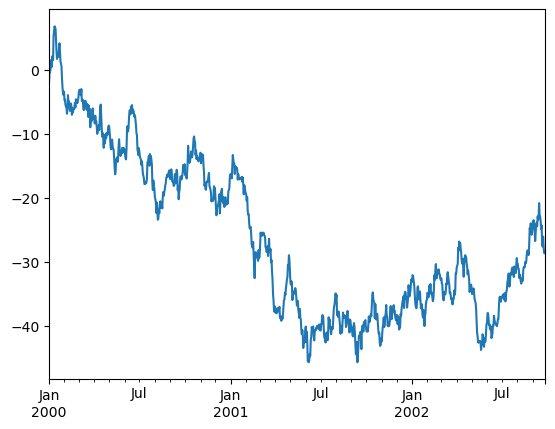

In [66]:
import matplotlib.pyplot as plt
plt.close("all")

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

If running under Jupyter Notebook, the plot will appear on [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas.Series.plot). Otherwise use [`matplotlib.pyplot.show`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) to show it or [`matplotlib.pyplot.savefig`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) to write it to a file.

On a DataFrame, the [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method is a convenience to plot all of the columns with labels:

<Figure size 640x480 with 0 Axes>

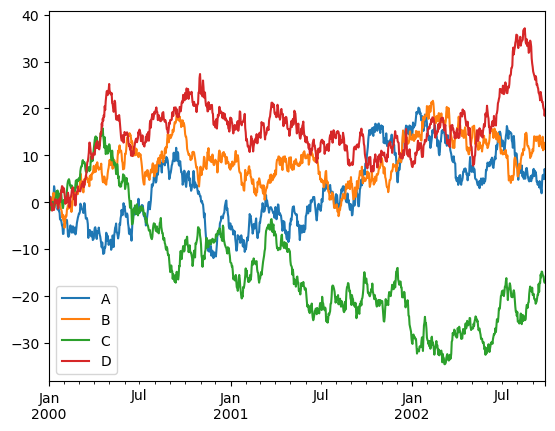

In [67]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

## Importing and exporting data

### CSV

[Writing to a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv): using [`DataFrame.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv)

In [68]:
df.to_csv("foo.csv")

[Reading from a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table): using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)

In [69]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.560453,0.108605,-2.057544,0.034935
1,2000-01-02,0.883278,0.156822,-1.200213,0.159183
2,2000-01-03,1.173978,0.104118,-1.536405,1.053458
3,2000-01-04,1.133951,0.520332,-1.426493,0.692820
4,2000-01-05,-0.495179,0.323601,-1.551864,-0.607551
...,...,...,...,...,...
995,2002-09-22,5.842395,11.070594,-15.617919,20.514020
996,2002-09-23,4.994173,12.590049,-15.870485,19.937609
997,2002-09-24,4.918851,11.364596,-16.859828,19.782043
998,2002-09-25,7.070056,11.953923,-17.179597,18.424958


### Excel

Reading and writing to [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel).

Writing to an excel file using [`DataFrame.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel):

In [70]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel):

In [71]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.560453,0.108605,-2.057544,0.034935
1,2000-01-02,0.883278,0.156822,-1.200213,0.159183
2,2000-01-03,1.173978,0.104118,-1.536405,1.053458
3,2000-01-04,1.133951,0.520332,-1.426493,0.692820
4,2000-01-05,-0.495179,0.323601,-1.551864,-0.607551
...,...,...,...,...,...
995,2002-09-22,5.842395,11.070594,-15.617919,20.514020
996,2002-09-23,4.994173,12.590049,-15.870485,19.937609
997,2002-09-24,4.918851,11.364596,-16.859828,19.782043
998,2002-09-25,7.070056,11.953923,-17.179597,18.424958


In [72]:
import matplotlib